In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df_2022 = pd.read_csv("C:/Users/ajala/Downloads/DATA SCIENCE/Udacity/stack-overflow-developer-survey-2022/survey_results_public.csv")
df_2022.shape

(73268, 79)

## Cleaning Data

In [14]:
# Set 'ResponseId' column as index and filter dataframe based on 'EUR European Euro' currency
mask = ((df_2022['Currency'] == 'EUR European Euro'))
df_mask_2022 = df_2022.loc[mask]
df2022 = df_mask_2022.set_index('ResponseId')

# Removing NULL and  negative values from 'CompTotal' column
df2022 = df2022.dropna(subset = ['CompTotal'] , how = 'any')
mask = ((df2022['CompTotal'] > 0))
df22_new = df2022.loc[mask]

# Removing outliers from 'CompTotal' column
q1 = df22_new['CompTotal'].quantile(0.25)
q3 = df22_new['CompTotal'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df22 = df22_new.loc[(df22_new['CompTotal'] > fence_low) & (df22_new['CompTotal'] < fence_high)]
df22['CompTotal'].describe()

count      9727.000000
mean      41344.455022
std       35023.037111
min           1.000000
25%        4500.000000
50%       41000.000000
75%       65000.000000
max      155000.000000
Name: CompTotal, dtype: float64

In [22]:
df22.shape

(9727, 78)

In [23]:
# defining the function for converting Object columns to dummies 
def cleanup_dummies(column_name, dummy_list):
    df_cd = pd.DataFrame(df22.loc[:, column_name])
    for i in dummy_list:
        if i == "C#" or i == "C++;":
            df_cd[i] = df22[df22[column_name].str.contains(i, na = False, case = False, regex  = False )].groupby('ResponseId').count()[column_name]
        else:    
            df_cd[i] = df22[df22[column_name].str.contains(i, na = False , case = False, regex = True)].groupby('ResponseId').count()[column_name]
    df_cd = df_cd.drop([column_name],axis=1).fillna(0)
    for i in dummy_list:
        per = (df_cd[i] == 0).sum()/ df_cd[i].count()
        if per > 0.90:
            df_cd = df_cd.drop(i, axis=1)
    df_cd.columns = [column_name + '_' + str(i) for i in df_cd.columns]
    return df_cd.astype(int)

### Cleaning object columns 

In [107]:
column_name = 'LanguageHaveWorkedWith'
dummy_list = ["JavaScript","HTML/CSS","SQL","Python","typescript","Java;","Bash/Shell","C#","C++;", "PHP",'go']
df_LanguageHaveWorkedWith = cleanup_dummies(column_name, dummy_list)

column_name = 'CodingActivities'
dummy_list = ['Hobby','I don’t code outside of work','Contribute to open-source projects','Freelance/contract work','School or academic work','Bootstrapping a business']
df_CodingActivities = cleanup_dummies(column_name, dummy_list)

column_name = 'LearnCode'
dummy_list = ['School','Other online resources','Books / Physical media','On the job training','Online Courses or Certification','Colleague']
df_Employment = cleanup_dummies(column_name, dummy_list)

column_name = 'LearnCodeOnline'
dummy_list = ['Technical documentation','Written Tutorials','Stack Overflow','Blogs','Online books','Online forum','Video-based Online Courses','How-to videos','Programming Games','Online challenges','Auditory material','Interactive tutorial','Coding sessions','Certification videos']
df_LearnCodeOnline = cleanup_dummies(column_name, dummy_list)

column_name = 'BuyNewTool'
dummy_list = ['Start a free trial','Visit developer communities','Ask developers','Research companies','Read ratings']
df_BuyNewTool = cleanup_dummies(column_name, dummy_list)

column_name = 'DevType'
dummy_list = ['Developer','full-stack','back-end','front-end','mobile','Other','Student','desktop or enterprise applications','embedded applications or devices','Engineering manager','Data scientist','Engineer','QA or test','Senior Executive','DevOps specialist','business analyst','game or graphics','Academic researcher','Security professional','Cloud infrastructure','Product manager','Educator','Blockchain']
df_DevType = cleanup_dummies(column_name, dummy_list)

column_name = 'PlatformHaveWorkedWith'
dummy_list = ['AWS','Colocation','DigitalOcean','Firebase','Google','Heroku','IBM','Linode','Managed Hosting','Azure','Oracle','OpenStack','OVH','VMware']
df_PlatformHaveWorkedWith = cleanup_dummies(column_name, dummy_list)

column_name = 'DatabaseHaveWorkedWith'
dummy_list = ['Cassandra','Couchbase','CouchDB','DynamoDB','Elasticsearch','IBM DB2','MariaDB','Microsoft SQL Server','MongoDB','SQL','Neo4j','Oracle','PostgreSQL','Firebase Realtime Database','Redis','SQLite']
df_DatabaseHaveWorkedWith = cleanup_dummies(column_name, dummy_list)

column_name = 'WebframeHaveWorkedWith'
dummy_list = ['Angular','Django','Express','FastAPI','Flask','Gatsby','jQuery','Laravel','Next.js','Node.js','Nuxt','React.js','Svelte','Vue','ASP.NET']
df_WebframeHaveWorkedWith = cleanup_dummies(column_name, dummy_list)

column_name = 'MiscTechHaveWorkedWith'
dummy_list = ['Apache Kafka','Apache Spark','Electron','Flutter','Keras','NumPy','Pandas','React Native','Scikit-learn','TensorFlow','Torch/PyTorch','Hugging Face Transformers']
df_MiscTechHaveWorkedWith = cleanup_dummies(column_name, dummy_list)

column_name = 'ToolsTechHaveWorkedWith'
dummy_list = ['Ansible','Chef','Docker','Flow','Homebrew','Kubernetes','npm','Pulumi','Puppet','Terraform','Unity 3D','Unreal Engine','Yarn']
df_ToolsTechHaveWorkedWith = cleanup_dummies(column_name, dummy_list)

column_name = 'NEWCollabToolsHaveWorkedWith'
dummy_list = ['Android Studio','Atom','CLion','Eclipse','IntelliJ','IPython/Jupyter','NetBeans','Notepad','PhpStorm','PyCharm','Sublime Text','Visual Studio','Webstorm']
df_NEWCollabToolsHaveWorkedWith = cleanup_dummies(column_name, dummy_list)

column_name = 'OpSysProfessional use'
dummy_list = ['BSD','Linux','macOS','Windows','Other']
df_OpSysProfessional = cleanup_dummies(column_name, dummy_list)

column_name = 'VersionControlSystem'
dummy_list = ['Git','Other','Mercurial','SVN',"I don't use one"]
df_VersionControlSystem = cleanup_dummies(column_name, dummy_list)

column_name = 'VCInteraction'
dummy_list = ['Code editor','Command-line','Version control hosting service web GUI','Dedicated version control GUI application']
df_VCInteraction = cleanup_dummies(column_name, dummy_list)

column_name = 'OfficeStackAsyncHaveWorkedWith'
dummy_list = ['Adobe Workfront','Airtable','Asana','Cerri','Confluence','Jira','Leankor','Microsoft','monday.com','Notion','Planview','Stack Overflow','Smartsheet','Swit','Trello','Wimi','Workzone','Wrike']
df_OfficeStackAsyncHaveWorkedWith = cleanup_dummies(column_name, dummy_list)

# Converting  'YearsCode' and 'YearsCodePro' from Object to Integer
df_YearsCode = (df22['YearsCode'].astype(str).str.replace('Less than 1 year', '0').replace('More than 50 years', '50')).astype(float).fillna(0).copy()
df_YearsCodePro = (df22['YearsCodePro'].astype(str).str.replace('Less than 1 year', '0').replace('More than 50 years', '50')).astype(float).fillna(0).copy()

# Dummy the categorical variables
df_cat22 = df22[['Age','EdLevel','MainBranch','RemoteWork','OrgSize','PurchaseInfluence','Blockchain'
                 ,'SOVisitFreq','SOAccount','SOPartFreq']].copy()
cat_vars = df_cat22[['Age','EdLevel','MainBranch','RemoteWork','OrgSize','PurchaseInfluence','Blockchain'
                 ,'SOVisitFreq','SOAccount','SOPartFreq']].columns
for var in  cat_vars:
        # for each cat add dummy var, drop original column
    df_cat22 = pd.concat([df_cat22.drop(var, axis=1), pd.get_dummies(df_cat22[var], prefix=var, prefix_sep='_', drop_first=False)], axis=1)

## Merging all dfs as one final dataframe

In [108]:
# Merging all dfs as one final dataframe
import functools
List_df = [df_cat22,df_YearsCode,df_YearsCodePro,df_OfficeStackAsyncHaveWorkedWith,df_VCInteraction
          ,df_VersionControlSystem,df_OpSysProfessional,df_NEWCollabToolsHaveWorkedWith,df_ToolsTechHaveWorkedWith
          ,df_MiscTechHaveWorkedWith,df_WebframeHaveWorkedWith,df_DatabaseHaveWorkedWith,df_PlatformHaveWorkedWith,df_DevType
          ,df_BuyNewTool,df_LearnCodeOnline,df_CodingActivities,df_Employment,df_LanguageHaveWorkedWith,df22[['WorkExp','CompTotal']]]
df_all = functools.reduce(lambda x,y : pd.merge(x,y, 
                                       on='ResponseId', 
                                       how='inner'), List_df )
# above code inference like below
# merge(merge(merge(merge(df1, df2), df3), df4), ..., df15)

# Fill numeric columns with the mean
df_all['WorkExp'].fillna((df_all['WorkExp'].mean()), inplace = True)

# Checking for any null values
df_all.isnull().values.any()

False

# Linear  Regression Model 

In [109]:
# Create X dataframe
y = df_all['CompTotal'].astype(int)
x = df_all.drop('CompTotal', axis = 1)

# Spliting df to the train and test 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

# Linear  Regression Model 
model_lr = LinearRegression().fit(X_train, y_train)
y_test_pred = model_lr.predict(X_test)
test = model_lr.score(X_test, y_test)
train =  model_lr.score(X_train, y_train)
print("train:", train , "test:", test)

train: 0.23584570932722604 test: 0.20730088992365592


In [110]:
# linear regression feature importance
from sklearn.datasets import make_regression

# get importance
importance = model_lr.coef_
feature_importance = pd.Series(importance, index = x.columns).sort_values(ascending=False)
feature_importance.head(60)


EdLevel_Professional degree (JD, MD, etc.)                                                    18818.812560
EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       17817.450974
EdLevel_Other doctoral degree (Ph.D., Ed.D., etc.)                                            17238.829685
EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          15593.050426
EdLevel_Something else                                                                        15255.902073
EdLevel_Associate degree (A.A., A.S., etc.)                                                   14028.304886
EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    12498.939593
EdLevel_Some college/university study without earning a degree                                12006.174404
RemoteWork_Fully remote                                                                       10875.960672
RemoteWork_Hybrid (some remote, some 

### Plot feature importances

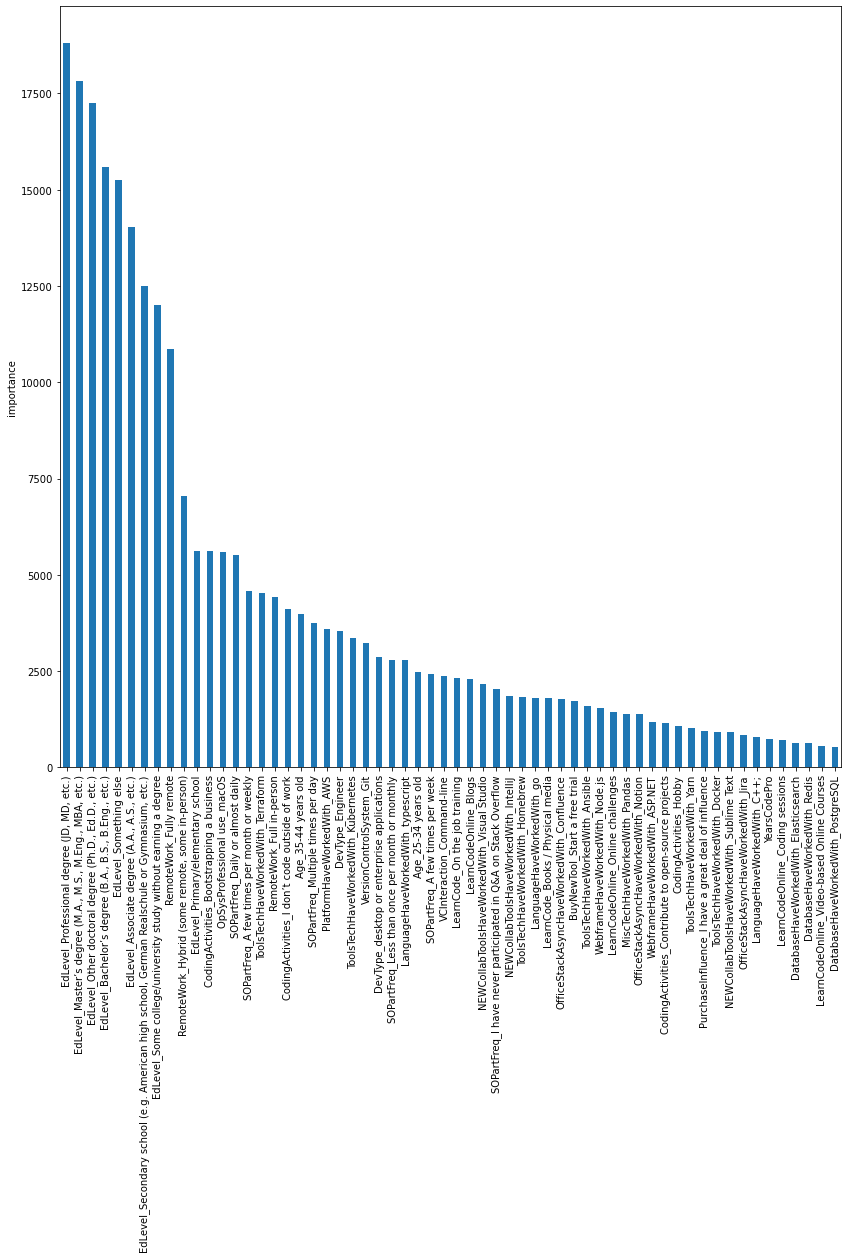

In [111]:
fim = feature_importance.head(60)
fim.plot(kind = 'bar')
plt.ylabel('importance')
plt.rcParams['figure.figsize'] = [14, 14]